# Data Download and Unzip

In [10]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip -P /resources/data

--2021-12-07 10:31:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245259777 (234M) [application/zip]
Saving to: ‘/resources/data/concrete_crack_images_for_classification.zip’

concrete_crack_imag 100%[===================>] 233.90M  30.6MB/s    in 7.4s    

2021-12-07 10:31:27 (31.5 MB/s) - ‘/resources/data/concrete_crack_images_for_classification.zip’ saved [245259777/245259777]



In [11]:
!unzip -q  /resources/data/concrete_crack_images_for_classification.zip -d  /resources/data

# Imports and Auxiliary Functions

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import torch
from torch.utils.data import Dataset

In [4]:
def show_data(data_sample, shape = (28, 28)):
  plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
  plt.title('y = ' + data_sample[1])

# Examine Files

In [5]:
file_dir  = '/resources/data'

In [6]:
negative = 'Negative'
positive = 'Positive'

In [7]:
neg_file_path = os.path.join(file_dir, negative)
pos_file_path = os.path.join(file_dir, positive)

In [9]:
neg_file_path

'/resources/data/Negative'

In [12]:
neg_files = [os.path.join(neg_file_path, file) for file in os.listdir(neg_file_path) if file.endswith('.jpg')]
pos_files = [os.path.join(pos_file_path, file) for file in os.listdir(pos_file_path) if file.endswith('.jpg')]

In [13]:
neg_files.sort()
neg_files[:3]

['/resources/data/Negative/00001.jpg',
 '/resources/data/Negative/00002.jpg',
 '/resources/data/Negative/00003.jpg']

In [14]:
pos_files.sort()
pos_files[:3]

['/resources/data/Positive/00001.jpg',
 '/resources/data/Positive/00002.jpg',
 '/resources/data/Positive/00003.jpg']

In [16]:
print('neg files length : ', len(neg_files))
print('pos files length : ', len(pos_files))

neg files length :  20000
pos files length :  20000


In [17]:
num_neg_samples = len(neg_files)
num_pos_samples = len(pos_files)
num_samples = num_neg_samples + num_pos_samples

# Assign Labels to Images

In [20]:
Y = torch.zeros([num_samples])

In [21]:
Y = Y.type(torch.LongTensor)
Y.type()

'torch.LongTensor'

In [22]:
Y.shape

torch.Size([40000])

In [27]:
Y[::2] = 1  # 짝수 index 는 1 : w/ Cracks
Y[1::2] = 0 # 홀수 index 는 0 : w/o Cracks

In [25]:
all_files = []
for pos_file, neg_file in zip(pos_files, neg_files):
  all_files.append(pos_file)
  all_files.append(neg_file)

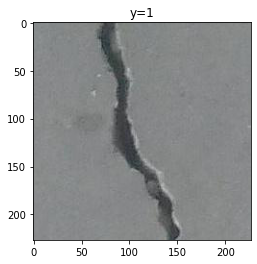

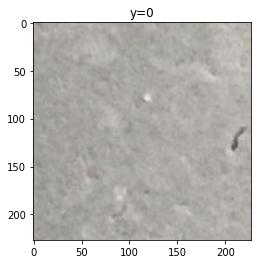

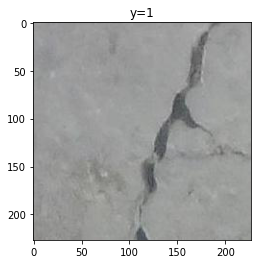

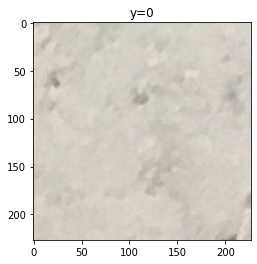

In [26]:
for y, file in zip(Y, all_files[:4]):
  plt.imshow(Image.open(file))
  plt.title("y="+str(y.item()))
  plt.show()

# Training and Validation Split

In [28]:
# Train Set
file_trian = all_files[:30000]
Y_train = Y[:30000]

# Validation Set
file_val = all_files[30000:]
Y_val = Y[30000:]

# Define Dataset Class

In [50]:
class CrackDataset(Dataset):
  
  # Constructor
  def __init__(self, transform=None, is_train=True):
    def get_files(file_dir):
      negative = 'Negative'
      positive = 'Positive'

      neg_file_path = os.path.join(file_dir, negative)
      pos_file_path = os.path.join(file_dir, positive)

      neg_files = [os.path.join(neg_file_path, file) for file in os.listdir(neg_file_path) if file.endswith('.jpg')]
      pos_files = [os.path.join(pos_file_path, file) for file in os.listdir(pos_file_path) if file.endswith('.jpg')]

      neg_files.sort()
      pos_files.sort()

      num_neg_samples = len(neg_files)
      num_pos_samples = len(pos_files)
      num_samples = num_neg_samples + num_pos_samples
      
      all_files = [None] * num_samples
      all_files[::2] = pos_files
      all_files[1::2] = neg_files

      return all_files, num_samples

    def get_labels(num_sampels):
      Y = torch.zeros([num_samples]).type(torch.LongTensor)
      Y[::2] = 1  # 짝수 index 는 1 : w/ Cracks
      Y[1::2] = 0 # 홀수 index 는 0 : w/o Cracks
      return Y
    
    def get_train_val_data(all_files, Y, is_train=False, split_idx=30000):
      if is_train:
        data = all_files[:split_idx]
        Y = Y[:split_idx]
      else:
        data = all_files[split_idx:]
        Y = Y[split_idx:]
      return data, Y

    file_dir  = '/resources/data'
    self.all_files, self.num_samples = get_files(file_dir)
    self.Y = get_labels(self.num_samples)
    self.data, self.Y = get_train_val_data(self.all_data, self.Y, is_train)
    self.len = len(self.all_files)
    self.transform = transform

  
  
  def __len__(self):
    return self.len
  
  def __getitem__(self, idx):
    img = Image.open(self.all_files[idx])
    y = self.Y[idx]
  
    if self.transform:
      img = self.transform(img)
    
    return img, y

In [51]:
val_dataset = CrackDataset(is_train=False)

plt.imshow(val_dataset[100][0])
plt.xlabel('y='+str(val_dataset[100][1].item()))
plt.title('validation data, sample {}'.format(int(100)))
plt.show()

AttributeError: ignored